In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB
import sklearn.naive_bayes
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def all_metrics(y_true, y_pred):
    print("accuracy:\t{:.3f}".format(metrics.accuracy_score(y_true, y_pred)))
    print("sensitivity: \t{:.3f}".format(metrics.recall_score(y_true, y_pred)))
    print("specificity: \t{:.3f}".format(metrics.recall_score(y_true, y_pred, pos_label=0)))
    print("kappa:    \t{:.3f}".format(metrics.cohen_kappa_score(y_true, y_pred)))

In [54]:
def all_metrics_tex(y_true, y_pred):
    def format_print(name, function, quad = True):
            print(r"\mathrm{",name,"}:"," {:.3f}".format(function(y_true, y_pred)),",\\quad" if quad else "", sep='')

    print(r"\begin{align*}")
    format_print("accuracy", metrics.accuracy_score)
    format_print("sensitivity", metrics.recall_score)
    format_print("specificity", lambda y1, y2: metrics.recall_score(y1, y2, pos_label=0))
    format_print("kappa", metrics.cohen_kappa_score, quad=False)
    print(r"\end{align*}")


In [9]:
def save_figure(file_name, save = True):
    if save:
        print("Saving figure to file ./cs5630_final_TeX/figures/"+file_name+".pdf")
        plt.savefig("../cs5630_final_TeX/figures/"+file_name+".pdf")

# San-Francisco

In [3]:
sf_data = pd.read_csv("../data/cleaned_data/SanFrancisco.csv")
sf_data.columns

Index(['Unnamed: 0', 'Dates', 'Category', 'DayOfWeek', 'PdDistrict', 'Address',
       'X', 'Y', 'year', 'month', 'day', 'hour', 'violent', 'street1',
       'street2', 'str1', 'str2'],
      dtype='object')

In [6]:
sf_data["Address"].drop_duplicates().shape[0]

23191

In [5]:
sf_data["street1"].drop_duplicates().shape[0]

12549

In [8]:
sf_data["str2"].drop_duplicates().shape[0]

201

### All classifiers

In [4]:
def prepare_data_(random = 0, test_size =0.3, strs = False, catPdDistrict = False):
    data = sf_data.drop(columns=["Unnamed: 0", "Dates", "Category", "street1", "street2", "Address"])
    if(not strs):
        data = data.drop(columns=["str1", "str2"])
    if(not catPdDistrict):
        data["PdDistrict"] = data["PdDistrict"].map({d:i for i, d in enumerate(sf_data["PdDistrict"].drop_duplicates())})
    X_train, X_test, y_train, y_test = train_test_split(
            pd.get_dummies(data.drop(columns=["violent"])),
            data["violent"], 
            test_size=test_size, random_state=random)
    return X_train, X_test, y_train, y_test
#
def prepare_data(data_name, random = 0, test_size = 0.3):
    if data_name == "paper":
        return prepare_data_(random=random, test_size=test_size, strs=False, catPdDistrict=False)
    elif data_name == "catPdDistrict":
        return prepare_data_(random=random, test_size=test_size, strs=False, catPdDistrict=True)
    elif data_name == "catPdDistrict_strs":
        return prepare_data_(random=random, test_size=test_size, strs=True, catPdDistrict=True)
    else:
        print("Unknown data_name=", data_name)

    

In [5]:
X_train, X_test, y_train, y_test = prepare_data("paper")
X_train.columns

Index(['DayOfWeek', 'PdDistrict', 'X', 'Y', 'year', 'month', 'day', 'hour'], dtype='object')

In [6]:
def fillDF(data_name, random):
    X_train, X_test, y_train, y_test = prepare_data(data_name=data_name, random=random)
    df = pd.DataFrame()
    for model, model_name in zip(
        [sklearn.naive_bayes.GaussianNB(), sklearn.naive_bayes.BernoulliNB()],
        ["GaussianNB", "BernoulliNB"]):
    #     
        model.fit(X_train, y_train)
        #
        y_train_pred = model.predict(X_train)
        cm_train = confusion_matrix(y_train, y_train_pred)
        tp_train = cm_train[0,0]
        tn_train = cm_train[1,1]
        fn_train = cm_train[0,1]
        fp_train = cm_train[1,0]
        #
        y_test_pred = model.predict(X_test)
        cm_test = confusion_matrix(y_test, y_test_pred)
        tp_test = cm_test[0,0]
        tn_test = cm_test[1,1]
        fn_test = cm_test[0,1]
        fp_test = cm_test[1,0]
    #
        df = pd.concat([df, pd.DataFrame([{
            "model":model_name, "data_name":data_name, "random":random, 
            "train_acc":accuracy_score(y_train, y_train_pred), "test_acc":accuracy_score(y_test, y_test_pred),
            "tp_train":tp_train, "tn_train":tn_train, "fn_train":fn_train, "fp_train":fp_train,
            "tp_test":tp_train, "tn_test":tn_train, "fn_test":fn_train, "fp_test":fp_train}
            ])])
    return df

## One fit for the dataset (goes to presentation)

### Paper choice

In [57]:
X_train, X_test, y_train, y_test = prepare_data("paper")
model = sklearn.naive_bayes.GaussianNB()
model.fit(X_train, y_train);


Saving figure to file ./cs5630_final_TeX/figures/NB_paper_train.pdf
accuracy:	0.546
sensitivity: 	0.511
specificity: 	0.582
kappa:    	0.093


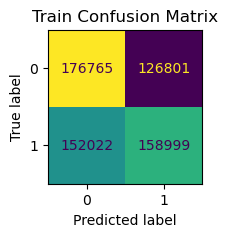

In [58]:
y_train_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(cm_train)
fig, ax = plt.subplots(figsize=(2, 2))
disp.plot(ax=ax, colorbar = None)
plt.title("Train Confusion Matrix")
save_figure("NB_paper_train")
all_metrics(y_train, y_train_pred)

In [59]:
all_metrics_tex(y_train, y_train_pred)

\begin{align*}
\mathrm{accuracy}: 0.546,\quad
\mathrm{sensitivity}: 0.511,\quad
\mathrm{specificity}: 0.582,\quad
\mathrm{kappa}: 0.093
\end{align*}


Saving figure to file ./cs5630_final_TeX/figures/NB_paper_test.pdf
accuracy:	0.549
sensitivity: 	0.512
specificity: 	0.586
kappa:    	0.099


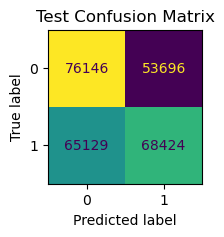

In [60]:
y_test_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test)
fig, ax = plt.subplots(figsize=(2, 2))
disp.plot(ax=ax, colorbar = None)
plt.title("Test Confusion Matrix")
save_figure("NB_paper_test")

all_metrics(y_test, y_test_pred)

In [62]:
all_metrics_tex(y_test, y_test_pred)

\begin{align*}
\mathrm{accuracy}: 0.549,\quad
\mathrm{sensitivity}: 0.512,\quad
\mathrm{specificity}: 0.586,\quad
\mathrm{kappa}: 0.099
\end{align*}


### catPdDistrict

In [63]:
X_train, X_test, y_train, y_test = prepare_data("catPdDistrict")
model = sklearn.naive_bayes.GaussianNB()
model.fit(X_train, y_train);


Saving figure to file ./cs5630_final_TeX/figures/NB_catPd_train.pdf
accuracy:	0.552
sensitivity: 	0.524
specificity: 	0.581
kappa:    	0.105


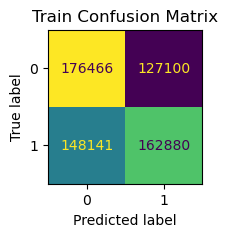

In [64]:
y_train_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(cm_train)
fig, ax = plt.subplots(figsize=(2, 2))
disp.plot(ax=ax, colorbar = None)
plt.title("Train Confusion Matrix")
save_figure("NB_catPd_train")

all_metrics(y_train, y_train_pred)

In [65]:
all_metrics_tex(y_train, y_train_pred)

\begin{align*}
\mathrm{accuracy}: 0.552,\quad
\mathrm{sensitivity}: 0.524,\quad
\mathrm{specificity}: 0.581,\quad
\mathrm{kappa}: 0.105
\end{align*}


Saving figure to file ./cs5630_final_TeX/figures/NB_catPd_test.pdf
accuracy:	0.554
sensitivity: 	0.526
specificity: 	0.583
kappa:    	0.109


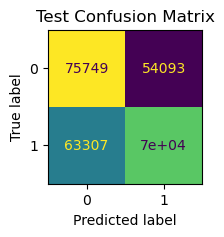

In [66]:
y_test_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test)
fig, ax = plt.subplots(figsize=(2, 2))
disp.plot(ax=ax, colorbar = None)
plt.title("Test Confusion Matrix")
save_figure("NB_catPd_test")


all_metrics(y_test, y_test_pred)

In [67]:
all_metrics_tex(y_test, y_test_pred)

\begin{align*}
\mathrm{accuracy}: 0.554,\quad
\mathrm{sensitivity}: 0.526,\quad
\mathrm{specificity}: 0.583,\quad
\mathrm{kappa}: 0.109
\end{align*}


### catPdDistrict_strs

In [68]:
X_train, X_test, y_train, y_test = prepare_data("catPdDistrict_strs")
model = sklearn.naive_bayes.GaussianNB()
model.fit(X_train, y_train);


Saving figure to file ./cs5630_final_TeX/figures/NB_strs_train.pdf
accuracy:	0.573
sensitivity: 	0.828
specificity: 	0.312
kappa:    	0.141


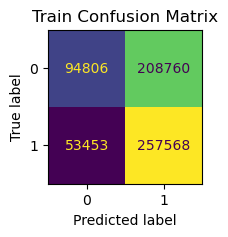

In [69]:
y_train_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(cm_train)
fig, ax = plt.subplots(figsize=(2, 2))
disp.plot(ax=ax, colorbar = None)
plt.title("Train Confusion Matrix")
save_figure("NB_strs_train")

all_metrics(y_train, y_train_pred)

In [70]:
all_metrics_tex(y_train, y_train_pred)

\begin{align*}
\mathrm{accuracy}: 0.573,\quad
\mathrm{sensitivity}: 0.828,\quad
\mathrm{specificity}: 0.312,\quad
\mathrm{kappa}: 0.141
\end{align*}


Saving figure to file ./cs5630_final_TeX/figures/NB_strs_test.pdf
accuracy:	0.573
sensitivity: 	0.826
specificity: 	0.312
kappa:    	0.139


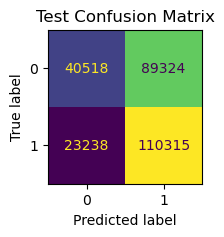

In [71]:
y_test_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test)
fig, ax = plt.subplots(figsize=(2, 2))
disp.plot(ax=ax, colorbar = None)
plt.title("Test Confusion Matrix")
save_figure("NB_strs_test")

all_metrics(y_test, y_test_pred)

In [72]:
all_metrics_tex(y_test, y_test_pred)

\begin{align*}
\mathrm{accuracy}: 0.573,\quad
\mathrm{sensitivity}: 0.826,\quad
\mathrm{specificity}: 0.312,\quad
\mathrm{kappa}: 0.139
\end{align*}


## Loops

In [52]:
dfAcc = pd.DataFrame()

In [53]:
data_name = "paper"
for random in range(10):
    print("random = ",random)
    dfAcc = pd.concat([dfAcc, fillDF(data_name, random)])

random =  0
random =  1
random =  2
random =  3
random =  4
random =  5
random =  6
random =  7
random =  8
random =  9


In [56]:
data_name = "catPdDistrict"
for random in range(10):
    print("random = ",random)
    dfAcc = pd.concat([dfAcc, fillDF(data_name, random)])

random =  0
random =  1
random =  2
random =  3
random =  4
random =  5
random =  6
random =  7
random =  8
random =  9


In [60]:
data_name = "catPdDistrict_strs"
for random in range(10):
    print("random = ",random)
    dfAcc = pd.concat([dfAcc, fillDF(data_name, random)])

random =  0
random =  1
random =  2
random =  3
random =  4
random =  5
random =  6
random =  7
random =  8
random =  9


In [64]:
dfAcc = dfAcc.reset_index(drop = True)

In [71]:
table3 = np.array([[226209, 118873], [121250, 236107]]) # NB, train
table4 = np.array([[55282, 31117], [31518, 57693]])     # NB, test
table_NB = table3 + table4

In [75]:
dfAcc = pd.concat([dfAcc, pd.DataFrame([{
            "model":"paper", "data_name":"paper", "random":0, 
            "train_acc":(table_NB[0,0]+table_NB[1,1])/sum(sum(table_NB)), 
            "test_acc":(table_NB[0,0]+table_NB[1,1])/sum(sum(table_NB)),
            "tp_train":table_NB[0,0], "tn_train":table_NB[1,1], "fn_train":table_NB[0,1], "fp_train":table_NB[1,0],
            "tp_test":table_NB[0,0], "tn_test":table_NB[1,1], "fn_test":table_NB[0,1], "fp_test":table_NB[1,0]
}])])

In [76]:
dfAcc

,model,data_name,random,train_acc,test_acc,tp_train,tn_train,fn_train,fp_train,tp_test,tn_test,fn_test,fp_test
0,GaussianNB,paper,0,0.546325,0.548871,176765,158999,126801,152022,176765,158999,126801,152022
1,BernoulliNB,paper,0,0.514295,0.515276,39521,276558,264045,34463,39521,276558,264045,34463
2,GaussianNB,paper,1,0.546574,0.547410,177516,158401,126055,152615,177516,158401,126055,152615
3,BernoulliNB,paper,1,0.514090,0.515754,39300,276653,264271,34363,39300,276653,264271,34363
4,GaussianNB,paper,2,0.547498,0.545534,178237,158248,125327,152775,178237,158248,125327,152775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,GaussianNB,catPdDistrict_strs,8,0.572895,0.572642,93792,258302,209552,52941,93792,258302,209552,52941
57,BernoulliNB,catPdDistrict_strs,8,0.580295,0.579859,122632,234010,180712,77233,122632,234010,180712,77233
58,GaussianNB,catPdDistrict_strs,9,0.574182,0.570341,94856,258029,208266,53436,94856,258029,208266,53436
59,BernoulliNB,catPdDistrict_strs,9,0.581597,0.578386,122011,235431,181111,76034,122011,235431,181111,76034


In [77]:
dfAcc = dfAcc.drop_duplicates()

In [78]:
dfAcc.to_csv("./dfAcc_nb.csv", index=False)

In [82]:
dfAcc = pd.read_csv("./dfAcc_nb.csv")

In [90]:
dfAgg = dfAcc.groupby(["model", "data_name"]).\
    agg({"train_acc":["mean", "std"], "test_acc":["mean", "std"]})
dfAgg.columns = ["_".join(col) for col in dfAgg.columns]
dfAgg = dfAgg.reset_index()
dfAgg = dfAgg.sort_values("train_acc_mean")
dfAgg

,model,data_name,train_acc_mean,train_acc_std,test_acc_mean,test_acc_std
2,BernoulliNB,paper,0.514569,0.000287,0.514635,0.000669
5,GaussianNB,paper,0.546937,0.000353,0.546666,0.001024
0,BernoulliNB,catPdDistrict,0.550665,0.000480,0.550570,0.001080
3,GaussianNB,catPdDistrict,0.552700,0.000452,0.552753,0.000928
4,GaussianNB,catPdDistrict_strs,0.573278,0.000451,0.572627,0.001066
1,BernoulliNB,catPdDistrict_strs,0.580596,0.000578,0.579965,0.001048
6,paper,paper,0.655192,NaN,0.655192,NaN


([<matplotlib.axis.XTick at 0x186f1ab50>,
 [Text(0, 0, 'paper'),
  Text(1, 0, 'catPdDistrict'),
  Text(2, 0, 'catPdDistrict_strs')])

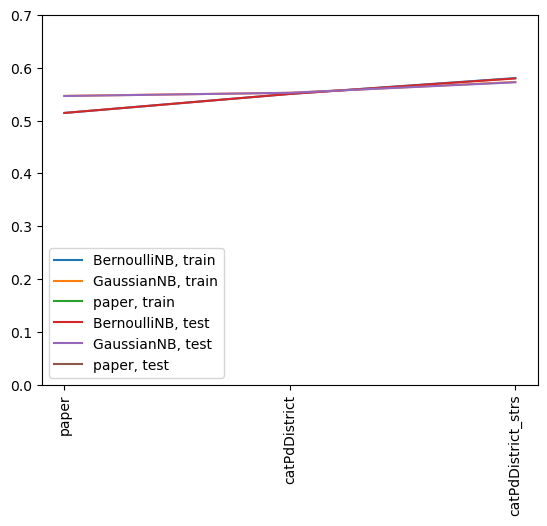

In [91]:
for m in dfAgg["model"].drop_duplicates():
    dd = dfAgg[dfAgg["model"]==m]
    plt.plot(range(dd.shape[0]), dd["train_acc_mean"], label = m+", train")
for m in dfAgg["model"].drop_duplicates():
    dd = dfAgg[dfAgg["model"]==m]
    plt.plot(range(dd.shape[0]), dd["test_acc_mean"], label = m+", test")
plt.legend()
plt.ylim(0, 0.7)
plt.xticks([0,1,2], dfAgg["data_name"].drop_duplicates(), rotation = "vertical")

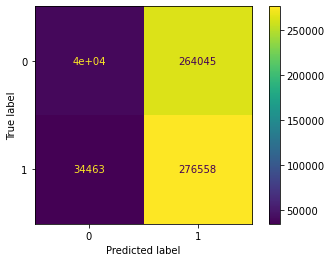

In [71]:
cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

.

.








# Backup

In [75]:
all_metrics(y_train,  y_train_pred)

accuracy:	0.580
sensitivity: 	0.752
specificity: 	0.404
kappa:    	0.157


In [76]:
y_test_pred = bnb.predict(X_test)

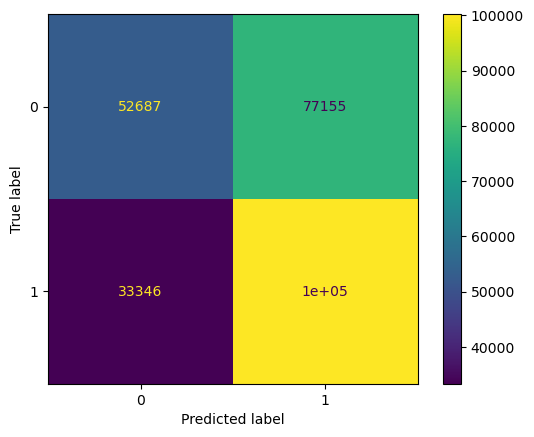

In [77]:
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_test).plot()

In [78]:
all_metrics(y_test,  y_test_pred)

accuracy:	0.580
sensitivity: 	0.750
specificity: 	0.406
kappa:    	0.157


# Mont Real

In [82]:
mt_data = pd.read_csv("../data/cleaned_data/MontReal.csv")
mt_data.columns

Index(['Unnamed: 0', 'category', 'date', 'postal_code', 'city',
       'neighbourhood', 'year', 'count', 'longitude', 'latitude', 'month',
       'day', 'hour', 'DayOfWeek', 'postal_code_1', 'postal_code_2', 'pc1',
       'pc2', 'violent'],
      dtype='object')

In [102]:
pd.get_dummies(mt_data.drop(columns=["Unnamed: 0", 'category', 'date', 'postal_code', 'postal_code_1', 'postal_code_2', 'violent']))

,year,count,longitude,latitude,month,day,hour,DayOfWeek,city_ANJOU,city_BAIE-D'URFE,...,pc2_2Y9,pc2_2Z6,pc2_3A3,pc2_3B5,pc2_3C5,pc2_3C6,pc2_3G5,pc2_3V6,pc2_4E3,pc2_other
0,2018,1,-73.626,45.567,9,13,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,1,-73.626,45.567,4,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,1,-73.629,45.569,1,10,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018,1,-73.629,45.569,11,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,1,-73.629,45.569,8,15,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136637,2020,1,-73.752,45.452,3,25,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
136638,2020,1,-73.752,45.452,3,27,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
136639,2021,1,-73.752,45.452,4,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
136640,2021,1,-73.752,45.452,6,6,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    pd.get_dummies(mt_data.drop(columns=["Unnamed: 0", 'category', 'date', 'postal_code', 'postal_code_1', 'postal_code_2', 'violent'])),
    mt_data.violent, 
    test_size=0.3, random_state=0)

In [104]:
[X_train.shape[0], X_test.shape[0]]

[95649, 40993]

### Gaussian Naive Bayes

In [105]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [106]:
y_train_pred = gnb.predict(X_train)

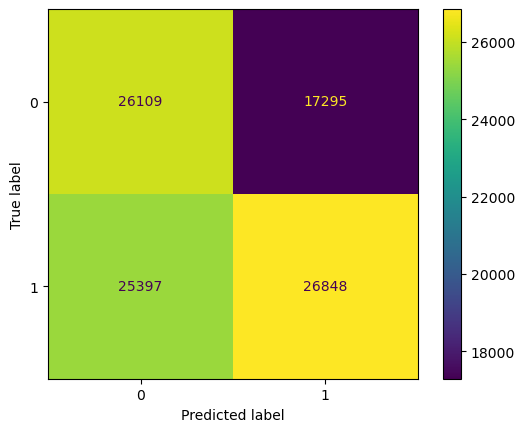

In [107]:
cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

In [108]:
all_metrics(y_train,  y_train_pred)

accuracy:	0.554
sensitivity: 	0.514
specificity: 	0.602
kappa:    	0.114


In [109]:
y_test_pred = gnb.predict(X_test)

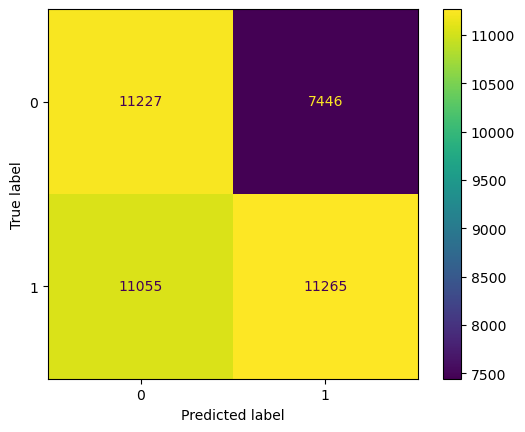

In [110]:
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_test).plot()

In [111]:
all_metrics(y_test,  y_test_pred)

accuracy:	0.549
sensitivity: 	0.505
specificity: 	0.601
kappa:    	0.104


### BernoulliNB

In [112]:
from sklearn.naive_bayes import BernoulliNB

In [113]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [114]:
y_train_pred = bnb.predict(X_train)

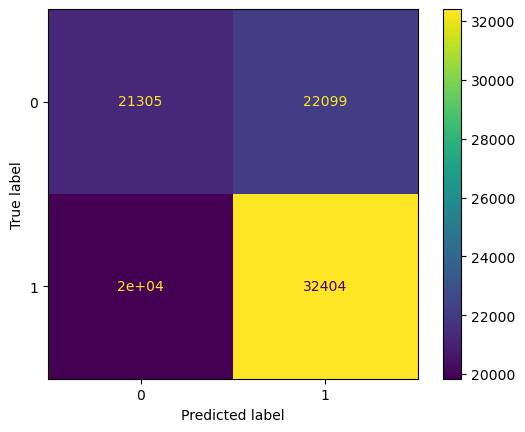

In [115]:
cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

In [116]:
all_metrics(y_train,  y_train_pred)

accuracy:	0.562
sensitivity: 	0.620
specificity: 	0.491
kappa:    	0.112


In [117]:
y_test_pred = bnb.predict(X_test)

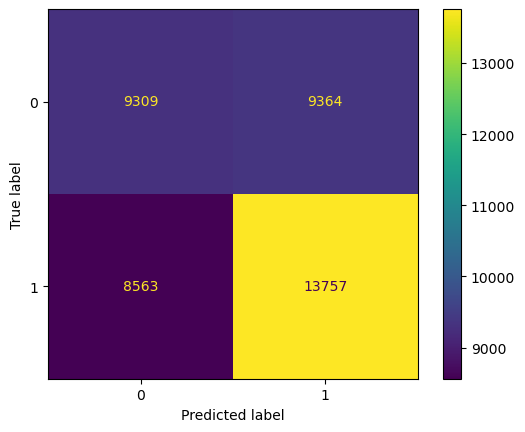

In [118]:
cm_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm_test).plot()

In [119]:
all_metrics(y_test,  y_test_pred)

accuracy:	0.563
sensitivity: 	0.616
specificity: 	0.499
kappa:    	0.115


# Denver

In [4]:
denver_data = pd.read_csv("../data/cleaned_data/denver.csv")
denver_data = denver_data.drop(columns = ['Unnamed: 0'])
denver_data.columns

Index(['OFFENSE_CATEGORY_ID', 'INCIDENT_ADDRESS', 'GEO_X', 'GEO_Y',
       'DISTRICT_ID', 'PRECINCT_ID', 'NEIGHBORHOOD_ID', 'year', 'month', 'day',
       'hour', 'DayOfWeek', 'street', 'str', 'violent'],
      dtype='object')

In [33]:
data = denver_data.drop(columns=['OFFENSE_CATEGORY_ID', 'INCIDENT_ADDRESS', 'PRECINCT_ID', 'NEIGHBORHOOD_ID', "street", 'str'])
data.dtypes

GEO_X          float64
GEO_Y          float64
DISTRICT_ID     object
year             int64
month            int64
day              int64
hour             int64
DayOfWeek        int64
violent           bool
dtype: object

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
            pd.get_dummies(data.drop(columns=["violent"])),
            data["violent"], 
            test_size=0.3, random_state=1)

In [35]:
X_train.columns

Index(['GEO_X', 'GEO_Y', 'year', 'month', 'day', 'hour', 'DayOfWeek',
       'DISTRICT_ID_1', 'DISTRICT_ID_2', 'DISTRICT_ID_3', 'DISTRICT_ID_4',
       'DISTRICT_ID_5', 'DISTRICT_ID_6', 'DISTRICT_ID_7', 'DISTRICT_ID_9',
       'DISTRICT_ID_U'],
      dtype='object')

In [36]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [42]:
y_train_pred = gnb.predict(X_train)
sum(y_train_pred)

0

In [43]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [44]:
y_train_pred = bnb.predict(X_train)
sum(y_train_pred)

0